In [ ]:
'''
  author : @hunarbatra
'''

import numpy as np                        
import pandas as pd                           
import matplotlib.pyplot as plt                
import matplotlib.ticker as ticker
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()                
import datetime
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Dataset download link : https://drive.google.com/file/d/1Z0-Iq37cVLGWzcGo6E7LodLNBHip394H/view?usp=sharing
# Data from National Health Mission
link = '/content/drive/My Drive/India-NHM-new.csv'
df = pd.read_csv(link, header=0, engine = 'python')
df.head()

,Month,Child Immunisation sessions held,child_vaccines_avg,noncommunicable_avg,communicable_avg,emergencies_avg,hivtb_test_avg,maternal_avg,mobility_data,driving_walking_avg,total_mobility_avg_old,stringency,total_mobility_avg
0,Feb 2020,-0.200000,-6.350000,1.785000,5.035714,-2.860000,2.525000,-4.144000,0.933333,18.607069,9.770201,5.420000,0.000000
1,Feb 2020,-0.200000,-6.350000,1.785000,5.035714,-2.860000,2.525000,-4.144000,-7.561379,3.385734,-2.087822,5.420000,1.888889
2,March 2020,-1.116667,-8.046667,-5.119375,0.895000,-6.288333,-1.758333,-11.002667,-16.056091,-11.835601,-13.945846,53.508387,0.033333
3,March 2020,-5.700000,-16.530000,-39.641250,-19.808571,-23.430000,-23.175000,-24.720000,-24.550804,-27.056935,-25.803870,53.508387,-26.825000


In [ ]:
child_vaccines_avg = df['child_vaccines_avg'].tolist()
noncommunicable_avg = df['noncommunicable_avg'].tolist()
communicable_avg = df['communicable_avg'].tolist()
emergencies_avg = df['emergencies_avg'].tolist()
hivtb_test_avg = df['hivtb_test_avg'].tolist()
maternal_avg = df['maternal_avg'].tolist()
total_mobility_avg = df['total_mobility_avg'].tolist()
stringency = df['stringency'].tolist()

In [ ]:
dates = ['1st Feb', '20th Feb', '11 March', '31th March']

# **Visualisation**

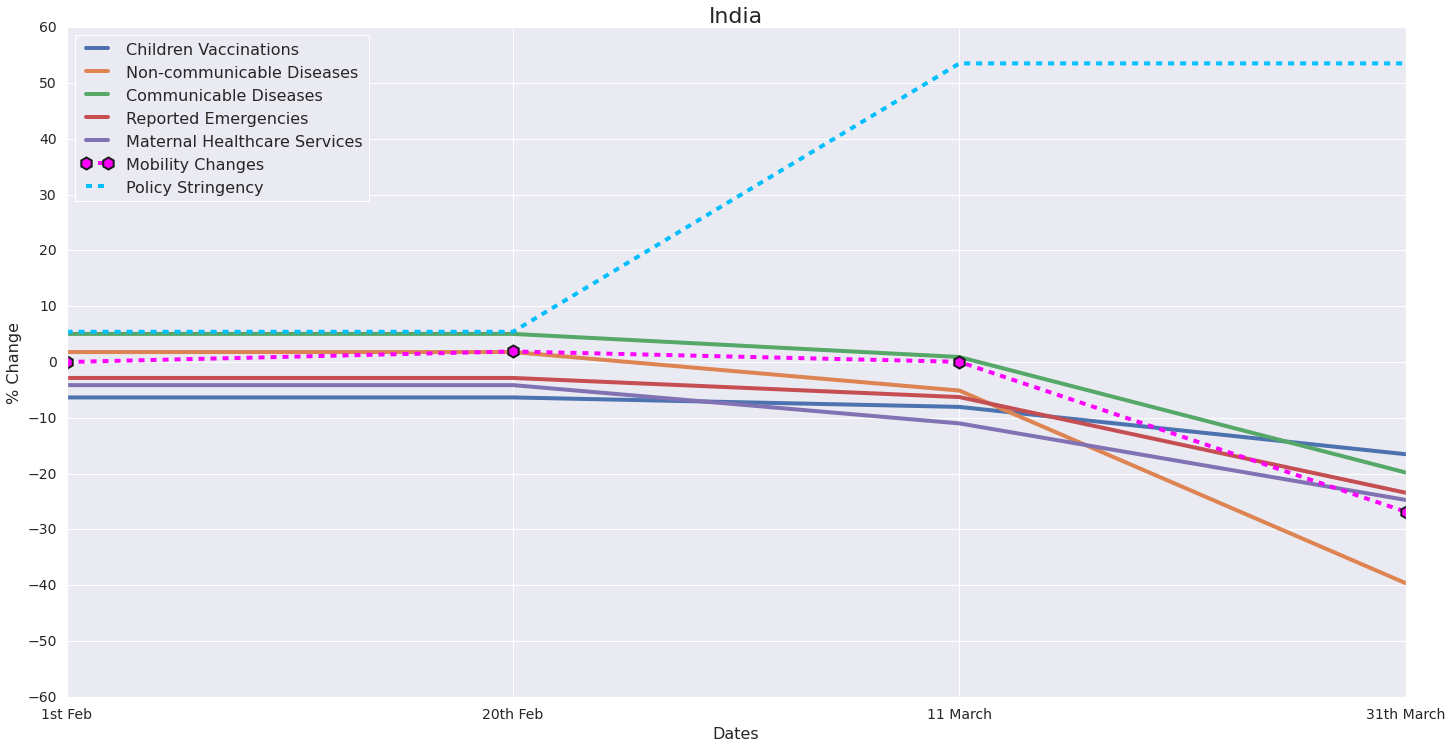

In [ ]:
N = 4
ind = np.arange(4) 

fig, ax = plt.subplots(figsize=(24,12))
ax.plot(child_vaccines_avg, label='Children Vaccinations',linewidth=4) # includes : BCG,	Pentavalent 1,	OPV 0 (Birth Dose),	Rotavirus 1,	Measles, Mumps, Rubella (MMR) Vaccine,	Typhoid
ax.plot(noncommunicable_avg, label='Non-communicable Diseases',linewidth=4) # Diabetes, Hypertension, Stroke (Paralysis), Acute Heart Diseases, Mental illness, Epilepsy, Dental, Oncology
ax.plot(communicable_avg, label='Communicable Diseases',linewidth=4) # Malaria,	Dengue,	Typhoid,	Asthma, Chronic Obstructive Pulmonary Disease (COPD), Respiratory infections,	Pyrexia of unknown origin (PUO),	Diarrhea with dehydration,	Hepatitis
ax.plot(emergencies_avg, label='Reported Emergencies',linewidth=4) # Obstetrics complications,	Acute Cardiac Emergencies,	CVA ( Cerebrovascular Disease)
# ax.plot(hivtb_test_avg, label='HIV / TB Lab Tests',linewidth=4)
ax.plot(maternal_avg, label='Maternal Healthcare Services',linewidth=4)
ax.plot(total_mobility_avg, label='Mobility Changes', linestyle='--',linewidth=4, marker='h', markeredgewidth = 2, markersize = 12, color='magenta')
ax.plot(stringency, label='Policy Stringency', linestyle='--', linewidth=4, color='deepskyblue')
plt.ylabel('% Change', fontsize=16)
plt.xlabel('Dates', fontsize=16)
plt.legend(loc="best", fontsize=16)
plt.title('India', fontsize=22)
plt.axis('tight')
plt.style.context('seaborn-white')
plt.yticks(np.arange(-60, 65, 10), fontsize=14)
plt.xticks(ind, dates, rotation=0, fontsize=14)
plt.show()

### **Correlation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Month                             4 non-null      object 
 1   Child Immunisation sessions held  4 non-null      float64
 2   child_vaccines_avg                4 non-null      float64
 3   noncommunicable_avg               4 non-null      float64
 4   communicable_avg                  4 non-null      float64
 5   emergencies_avg                   4 non-null      float64
 6   hivtb_test_avg                    4 non-null      float64
 7   maternal_avg                      4 non-null      float64
 8   mobility_data                     4 non-null      float64
 9   driving_walking_avg               4 non-null      float64
 10  total_mobility_avg_old            4 non-null      float64
 11  stringency                        4 non-null      float64
 12  total_mobili

In [ ]:
df_new = df.iloc[:,[2,3,4,5,7,11,12]]
df_new.fillna(0)
df_new.rename(columns={"child_vaccines_avg": "Children Vaccinations", "noncommunicable_avg": "Non-communicable Diseases", "communicable_avg": "Communicable Diseases", 
                   "emergencies_avg": "Reported Emergencies", "maternal_avg": "Maternal Services", "stringency": "Policy Stringency", "total_mobility_avg": "Mobility"}, inplace = True)
df_new.head()

,Children Vaccinations,Non-communicable Diseases,Communicable Diseases,Reported Emergencies,Maternal Services,Policy Stringency,Mobility
0,-6.350000,1.785000,5.035714,-2.860000,-4.144000,5.420000,0.000000
1,-6.350000,1.785000,5.035714,-2.860000,-4.144000,5.420000,1.888889
2,-8.046667,-5.119375,0.895000,-6.288333,-11.002667,53.508387,0.033333
3,-16.530000,-39.641250,-19.808571,-23.430000,-24.720000,53.508387,-26.825000


In [ ]:
# Scale data
from sklearn.preprocessing import StandardScaler
df_s = df_new.copy()
cols_to_norm = [col for col in df_s.columns if col not in ['Country']]
df_s[cols_to_norm] = StandardScaler().fit_transform(df_s[cols_to_norm])
df_s.head()

,Children Vaccinations,Non-communicable Diseases,Communicable Diseases,Reported Emergencies,Maternal Services,Policy Stringency,Mobility
0,0.703526,0.703526,0.703526,0.703526,8.164966e-01,-1.0,0.522397
1,0.703526,0.703526,0.703526,0.703526,8.164966e-01,-1.0,0.680893
2,0.301511,0.301511,0.301511,0.301511,-2.976149e-10,1.0,0.525194
3,-1.708564,-1.708564,-1.708564,-1.708564,-1.632993e+00,1.0,-1.728484


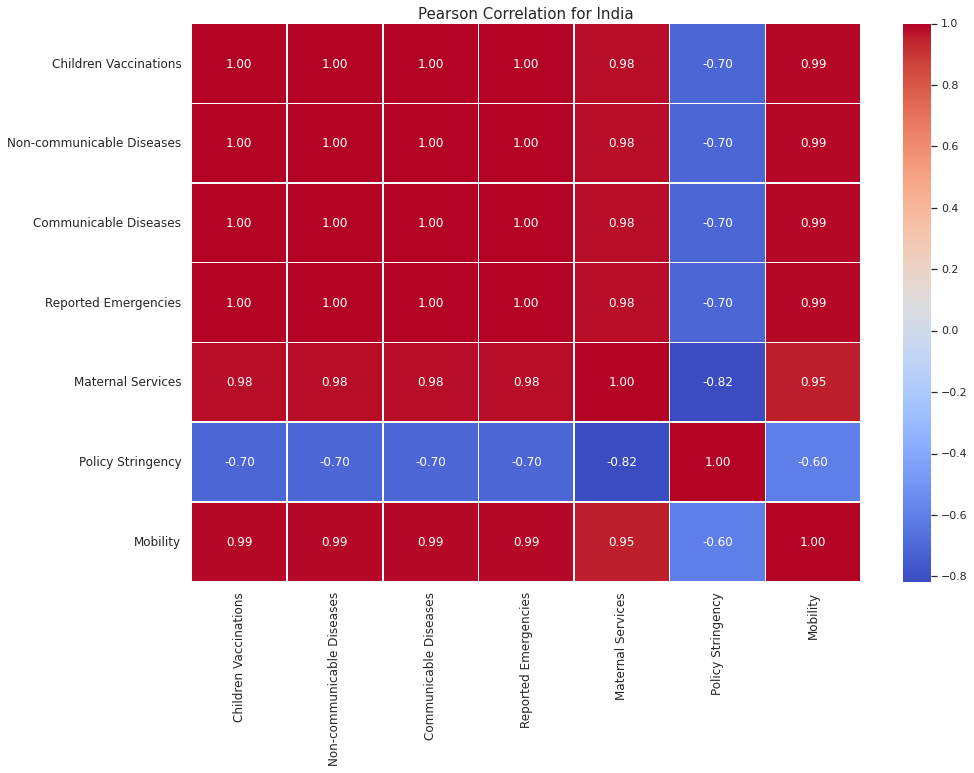

In [ ]:
df_c = df_new
# Pearson correlation heat map 
f,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df_c.corr(),linewidth=0.5,annot=True,annot_kws={"size":12},fmt=".2f",ax=ax,cmap="coolwarm")
ax.axes.set_title("Pearson Correlation for India",fontsize=15)
ax.tick_params(labelsize=12);